In [2]:
%matplotlib inline

import pyvisa as visa
import numpy as np
import matplotlib.pyplot as plt

from struct import unpack
from typing import List

In [3]:
# Settings

rm = visa.ResourceManager()
instruments = rm.list_resources()

scope = rm.open_resource(instruments[0])

scope.write('DATA:SOU CH1')
scope.write('DATA:WIDTH 1')
scope.write('DATA:ENC RPB')

14

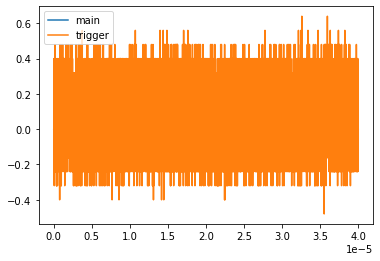

In [6]:
def get_data(channel: List[str]):

    result = []

    # scope.write('ACQuire:STATE OFF')
    # scope.write('ACQuire:STOPAfter SEQuence')
    # scope.write('ACQuire:STATE ON')
    # scope.write('ACQuire:STATE OFF')

    for ch in channel:

        scope.write(f'DATA:SOU {ch}')

        y_mult = float(scope.query('WFMPRE:YMULT?'))
        y_zero = float(scope.query('WFMPRE:YZERO?'))
        y_off = float(scope.query('WFMPRE:YOFF?'))
        x_incr = float(scope.query('WFMPRE:XINCR?'))

        scope.write('CURVE?')
        data = scope.read_raw()
        header_len = 2 + int(data[1])
        header = data[:header_len]
        ADC_wave = data[header_len:-1]

        ADC_wave = np.array(unpack('%sB' % len(ADC_wave), ADC_wave))

        Volts = (ADC_wave - y_off) * y_mult + y_zero

        Time = np.arange(0, x_incr * len(Volts), x_incr)

        result.append((Volts, Time))

    scope.write('ACQuire:STOPAfter RUNSTop')
    # scope.write('ACQuire:STATE ON')

    return result


main_trace, trigger_trace = get_data(['CH1', 'CH2'])

time = main_trace[1]

plt.plot(time, main_trace[0], label='main')
plt.plot(time, trigger_trace[0], label='trigger')
plt.legend()
plt.show()

In [6]:
print(scope.query('DATa:STARt?'))
print(scope.query('DATa:STOP?'))


1

100000

